### Recurrence relation and update rule

- The manual update is written as a recurrence: $x_{\text{next}} = x_{\text{current}} - \alpha f'(x_{\text{current}})$, where $\alpha$ is the learning rate and $f'(x)$ is the derivative of the function at the current guess. [ds100](https://ds100.org/fa23-course-notes/gradient_descent/gradient_descent.html)

- This is exactly the standard gradient descent update in 1D: take the current point, subtract a scaled derivative, and repeat; large $\alpha$ moves fast but risks overshooting, while small $\alpha$ moves slowly but more stably. [en.wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

### Gradient descent function structure

- The function `gradient_descent` takes as inputs:    
    (1) the derivative of the function to optimize,   
    (2) an `initial_guess`,    
    (3) a `learning_rate` $\alpha$, and    
    (4) `n_steps`,       
    then returns all guesses over time (e.g., as a NumPy array). [informatika.stei.itb.ac](https://informatika.stei.itb.ac.id/~rinaldi.munir/Matdis/2024-2025/Makalah/Makalah-IF1220-Matdis-2024%20(50).pdf)

- Inside, it initializes a list/array of guesses with the initial guess, keeps a `current_guess` variable, and in a loop applies the recurrence relation to produce a new guess each iteration, appending it to the list until the desired number of steps is reached. [ds100](https://ds100.org/fa23-course-notes/gradient_descent/gradient_descent.html)

In [15]:
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144)/10

In [16]:
def derivative_arbitrary(x):
    return (4*x**3 - 45*x**2 + 160*x - 180)/10


In [17]:
def gradient_descent(df, initial_guess, alpha, n):
    """Performs n steps of gradient descent on df using learning rate alpha starting
       from initial_guess. Returns a numpy array of all guesses over time."""
    guesses = [initial_guess]
    current_guess = initial_guess
    while len(guesses) < n:
        current_guess = current_guess - alpha * df(current_guess)
        guesses.append(current_guess)
        
    return np.array(guesses)

In [18]:
gradient_descent(derivative_arbitrary, 4, 0.3, 20)

array([4.        , 4.12      , 4.26729664, 4.44272584, 4.64092624,
       4.8461837 , 5.03211854, 5.17201478, 5.25648449, 5.29791149,
       5.31542718, 5.3222606 , 5.32483298, 5.32578765, 5.32614004,
       5.32626985, 5.32631764, 5.32633523, 5.3263417 , 5.32634408])

### Behavior for different learning rates

- Running `gradient_descent` with $\alpha = 0.3$ and the same starting point reproduces the stable, convergent trajectory seen in the earlier manual steps, moving smoothly toward the global minimum near $x \approx 5.3$. [ds100](https://ds100.org/fa23-course-notes/gradient_descent/gradient_descent.html)

- Larger learning rates like $\alpha = 1$ or $1.5$ cause the sequence to bounce back and forth across the minimum or behave erratically, while smaller rates like $\alpha = 0.1$ converge more slowly but without large oscillations. [machinelearningmastery](https://www.machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/)

In [20]:
gradient_descent(derivative_arbitrary, 4, 1.5, 20)

array([4.        , 4.6       , 5.6284    , 4.39841721, 5.36714058,
       5.23345463, 5.50301118, 4.85283564, 5.77676546, 3.72284331,
       3.96846217, 4.53018801, 5.55049763, 4.6927978 , 5.70865641,
       4.05220573, 4.7135408 , 5.72270104, 3.98700301, 4.57133193])

### Visualizing the trajectory

- A helper plotting function takes the list of guesses and overlays them on the function curve, so you can see the path of gradient descent as a sequence of points moving downhill over iterations. [machinelearningmastery](https://www.machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/)

- By changing starting points and learning rates, the plots show that the algorithm can converge to different minima (local vs global) and that hyperparameters like $\alpha$ materially affect where and how it converges. [en.wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)

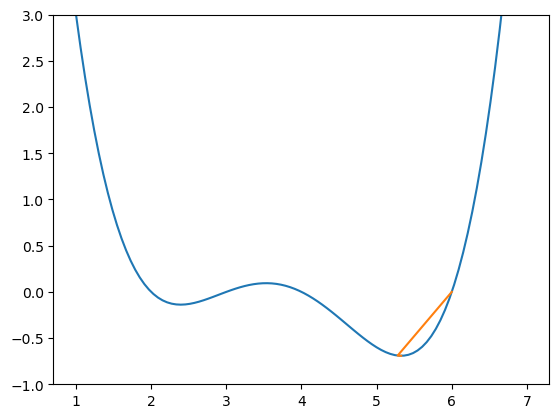

In [21]:
import matplotlib.pyplot as plt

trajectory = gradient_descent(derivative_arbitrary, 6, 0.3, 20)

def plot_arbitrary():
    x = np.linspace(1, 7, 100)
    plt.plot(x, arbitrary(x))
    axes = plt.gca()
    axes.set_ylim([-1, 3])

plot_arbitrary()
plt.plot(trajectory, arbitrary(trajectory));

### Relation to practical optimizers

- The core of many numerical optimizers is this same pattern: repeated updates using current point minus learning rate times gradient; in higher dimensions, the scalar derivative $f'(x)$ is replaced by the gradient vector $\nabla_\theta L(\theta)$. [jeremyjordan](https://www.jeremyjordan.me/gradient-descent/)

- More sophisticated libraries add stopping criteria (e.g., stop when changes in loss are small), step‑size adaptation, and other tricks on top of this basic update, but conceptually they are still applying a gradient descent–style recurrence to minimize a loss. [people.eecs.berkeley](https://people.eecs.berkeley.edu/~jiantao/225a2020spring/scribe/EECS225A_Lecture_16.pdf)